In [22]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['axes.facecolor']='white'
matplotlib.rcParams['axes.edgecolor']='black'
matplotlib.rcParams['xtick.color']='black'
matplotlib.rcParams['ytick.color']='black'
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["black", "#e94cdc", "0.7"])
matplotlib.rcParams['axes.linewidth']=1.3
matplotlib.rcParams['text.color']='black'
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [31]:
matplotlib.rcParams['figure.figsize'] = (10, 6)

### Задача 1

1. Используя генератор случайных чисел MS Excel, создайте три временных ряда: $\epsilon_{1t}, \epsilon_{2t}, \epsilon_{3t}$. Каждый временной ряд должен включать 500 наблюдений и
представлять собой последовательность независимых нормально распределенных
случайных величин с нулевым математическим ожиданием и дисперсией равной единице (белый шум).

2. Используя полученные переменные, создайте три временных ряда, являющихся независимыми друг от друга случайными блужданиями:
    
$x_{t} = x_{t-1} + \epsilon_{1t},\  x_{1} = 0$

$y_{t} = y_{t-1} + \epsilon_{2t},\  y_{1} = 0$

$z_{t} = z_{t-1} + \epsilon_{3t},\  z_{1} = 0$

3. Импортируйте переменные x, y и z в эконометрический пакет. Тестируйте их стационарность. Оцените парные регрессии с константой: y на x, z на x, z на y. Получили ли вы значимые коэффициенты при переменных? Какие значения R-квадратов вы получили? Как можно объяснить результат?

4. Перейдите к стационарным разностям и оцените регрессии $\Delta y$ на $\Delta x$, $\Delta z$ на $\Delta x$, $\Delta z$
на $\Delta y$. Получили ли вы значимые оценки коэффициентов этом случае? Как изменились значения R-квадратов. Объясните различие в результатах

In [4]:
epsilon1 = np.random.normal(size=(500,))
epsilon2 = np.random.normal(size=(500,))
epsilon3 = np.random.normal(size=(500,))

In [7]:
x = [epsilon1[0]]
y = [epsilon2[0]]
z = [epsilon3[0]]
for i in range(1, len(epsilon1)-1):
    x.append(x[-1] + epsilon1[i])
    y.append(y[-1] + epsilon2[i])
    z.append(z[-1] + epsilon3[i])

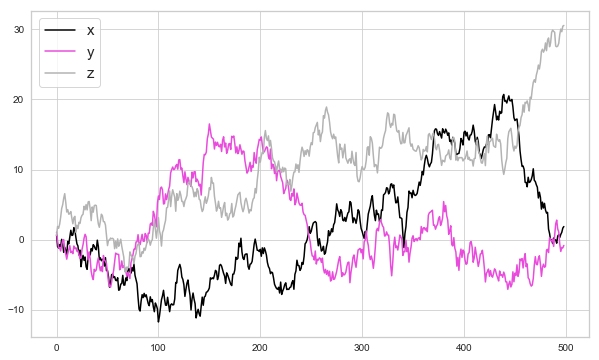

In [14]:
plt.plot(x, label='x');
plt.plot(y, label='y');
plt.plot(z, label='z');
plt.legend(fontsize=15);

In [21]:
print('p-value Дики Фуллера для ряда x:', adfuller(x, regression='c')[1])
print('p-value Дики Фуллера для ряда y:', adfuller(y, regression='c')[1])
print('p-value Дики Фуллера для ряда z:', adfuller(z, regression='c')[1])

p-value Дики Фуллера для ряда x: 0.6127468828557012
p-value Дики Фуллера для ряда y: 0.3561134239326645
p-value Дики Фуллера для ряда z: 0.8895723163531553


Все 3 ряда нестационарны

In [23]:
dat = pd.DataFrame([x, y, z]).T
dat.columns = ['x', 'y', 'z']
dat.head()

,x,y,z
0,0.688936,1.075250,0.625572
1,-0.996283,-0.174985,1.879522
2,-1.187718,-1.147299,1.621405
3,-0.701433,-1.140840,2.179908
4,-0.995786,-1.612910,3.174793


In [28]:
model_y_x = smf.ols('y ~ x', data=dat).fit()
print(model_y_x.summary())
print()
model_z_x = smf.ols('z ~ x', data=dat).fit()
print(model_z_x.summary())
print()
model_z_y = smf.ols('z ~ y', data=dat).fit()
print(model_z_y.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     184.4
Date:                Mon, 27 May 2019   Prob (F-statistic):           6.08e-36
Time:                        10:18:59   Log-Likelihood:                -1536.7
No. Observations:                 499   AIC:                             3077.
Df Residuals:                     497   BIC:                             3086.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2734      0.241      9.432      0.0

Во всех трёх моделях коэффициенты получились значимые, однако в действительности никакой связи между величинами нет

In [39]:
delta_x = np.diff(x)
delta_y = np.diff(y)
delta_z = np.diff(z)
dat_2 = pd.DataFrame(np.hstack((delta_x.reshape(-1, 1), delta_y.reshape(-1, 1), delta_z.reshape(-1, 1))), 
                     columns=['delta_x', 'delta_y', 'delta_z'])

In [40]:
model_dy_dx = smf.ols('delta_y ~ delta_x', data=dat_2).fit()
print(model_dy_dx.summary())
print()
model_dz_dx = smf.ols('delta_z ~ delta_x', data=dat_2).fit()
print(model_dz_dx.summary())
print()
model_dz_dy = smf.ols('delta_z ~ delta_y', data=dat_2).fit()
print(model_dz_dy.summary())

                            OLS Regression Results                            
Dep. Variable:                delta_y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     4.368
Date:                Mon, 27 May 2019   Prob (F-statistic):             0.0371
Time:                        10:25:56   Log-Likelihood:                -720.03
No. Observations:                 498   AIC:                             1444.
Df Residuals:                     496   BIC:                             1452.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0036      0.046     -0.077      0.9

Коэффициенты перестали быть значимыми

### Задача 2

Моделируется зависимость курса ценной бумаги (переменная P) от фондового индекса (переменная INDEX). Исходный файл с данными cointegration.wf1.

1. Коинтегрированы ли рассматриваемые переменные? Осуществите соответствующий тест.

2. Оцените параметры модели коррекции ошибок:
$\Delta P_{t}=\gamma_{0}+\gamma_{1} \cdot \Delta I N D E X_{t}+\gamma_{2} \cdot e_{t-1}+\varepsilon_{t}$
.
Быстро ли в рассматриваемом случае происходит возврат модели к долгосрочному
равновесию?

In [47]:
dat = pd.read_csv('/Users/anton.andreytsev/Desktop/cointegration.csv')
dat.head()

,obs,INDEX,P
0,1,100.000000,100.000000
1,2,101.276474,70.871457
2,3,103.009607,67.729168
3,4,102.775425,60.613207
4,5,101.688725,65.374389


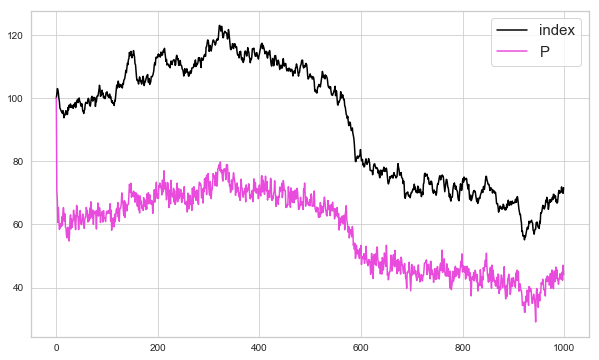

In [51]:
plt.plot(dat.INDEX, label='index');
plt.plot(dat.P, label='P');
plt.legend(fontsize=15);

Проверим ряды на коинтегрированность

1)

In [52]:
print('p-value Дики Фуллера для ряда Index:', adfuller(dat.INDEX, regression='c')[1])
print('p-value Дики Фуллера для ряда P:', adfuller(dat.P, regression='c')[1])

p-value Дики Фуллера для ряда Index: 0.8647390819085452
p-value Дики Фуллера для ряда P: 0.8845905293965235


Оба ряда нестационарны

In [53]:
print('p-value Дики Фуллера для ряда Index:', adfuller(np.diff(dat.INDEX), regression='c')[1])
print('p-value Дики Фуллера для ряда P:', adfuller(np.diff(dat.P), regression='c')[1])

p-value Дики Фуллера для ряда Index: 0.0
p-value Дики Фуллера для ряда P: 2.637290330619328e-27


Но оба ряда интегрированны первого порядка

2)

In [77]:
X = np.hstack((np.ones(dat.INDEX.shape[0]).reshape(-1, 1), dat.INDEX.values.reshape(-1, 1)))
y = dat.P.values
betas = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
betas

array([-0.1456407,  0.6274526])

Получаем ряд остатков

In [78]:
e = y - X.dot(betas)

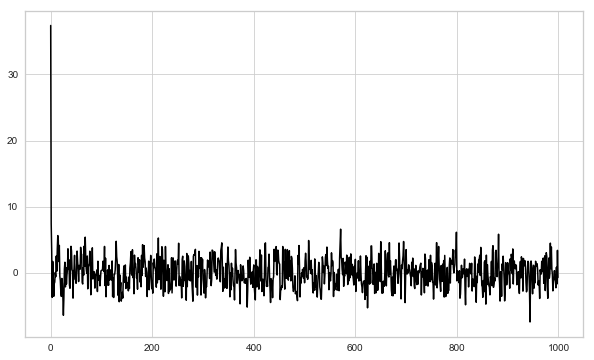

In [79]:
plt.plot(e);

Судя по картинке ряд остатков стационарен, проверим это статистически

In [80]:
print('p-value Дики Фуллера для ряда остатков:', adfuller(e)[1])
print('p-value KPSS для ряда остатков:', kpss(e)[1])

p-value Дики Фуллера для ряда остатков: 0.0
p-value KPSS для ряда остатков: 0.1


Вывод: ряды P и INDEX - коинтегрированы

Оценим модель коррекции ошибок

In [87]:
dat_2 = pd.DataFrame([np.diff(dat.P), np.diff(dat.INDEX), e[:-1]]).T
dat_2.columns = ['delta_p', 'delta_index', 'e_t_1']
dat_2.head()

,delta_p,delta_index,e_t_1
0,-29.128543,1.276474,37.400380
1,-3.142288,1.733133,7.470910
2,-7.115961,-0.234181,3.241163
3,4.761182,-1.086701,-3.727860
4,-3.342687,-1.690432,1.715175


In [88]:
ecm_model = smf.ols('delta_p ~ delta_index + e_t_1', data=dat_2).fit()
print(ecm_model.summary())

                            OLS Regression Results                            
Dep. Variable:                delta_p   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     448.3
Date:                Mon, 27 May 2019   Prob (F-statistic):          1.42e-139
Time:                        10:55:21   Log-Likelihood:                -2118.2
No. Observations:                 999   AIC:                             4242.
Df Residuals:                     996   BIC:                             4257.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0471      0.064     -0.737      

### Задача 4

Временные ряды $x_{t}$ и $y_{t}$ являются независимыми случайными блужданиями, временные ряды $u_{t}$ и $v_{t}$ являются стационарными процессами авторегрессии первого порядка. Случайные ошибки всех четырех рядов также независимы друг от
друга. 

Рассмотрим следующие временные ряды: $g_{t} = x_{t} + u_{t},\ f_{t} = x_{t} + y_{t},\  h_{t} = x_{t} + v_{t},\  p_{t} = u_{t} + v_{t}$.

• Коинтегрированы ли ряды $f_{t}$ и $g_{t}$?

• Коинтегрированы ли ряды $h_{t}$ и $g_{t}$?

• Коинтегрированы ли ряды $p_{t}$ и $g_{t}$?

Формально обоснуйте свой ответ. Для коинтегрированных рядов укажите коинтегрирующий вектор.

In [130]:
const_u, const_v, coef_u, coef_v = 3, 4, 0.3, 0.2
eps1 = np.random.normal(size=1000)
eps2 = np.random.normal(size=1000)
eps3 = np.random.normal(size=1000)
eps4 = np.random.normal(size=1000)
x = [eps1[0]]
y = [eps2[0]]
u = [const_u]
v = [const_v]
for i in range(1, 1000):
    x.append(x[-1] + eps1[i])
    y.append(y[-1] + eps2[i])
    u.append(const_u + coef_u*u[-1] + eps3[i])
    v.append(const_v + coef_v*v[-1] + eps4[i])

In [131]:
g = np.array(x) + np.array(u)
f = np.array(x) + np.array(y)
h = np.array(x) + np.array(v)
p = np.array(u) + np.array(v)

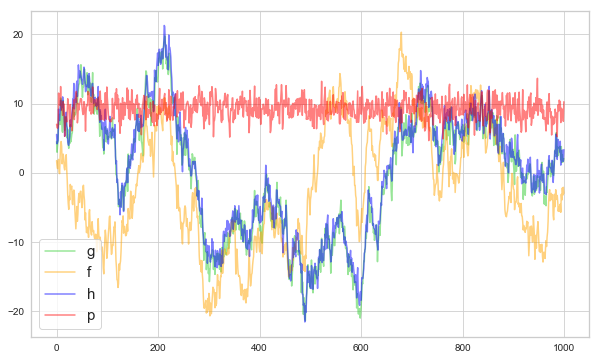

In [132]:
plt.plot(g, label='g', color='limegreen', alpha=0.5);
plt.plot(f, label='f', alpha=0.5, color='orange');
plt.plot(h, label='h', color='blue', alpha=0.5);
plt.plot(p, label='p', color='red', alpha=0.5);
plt.legend(fontsize=15);

1) f и g

In [143]:
print('p-value Дики Фуллера для ряда f:', adfuller(f)[1])
print('p-value Дики Фуллера для ряда g:', adfuller(g)[1])

p-value Дики Фуллера для ряда f: 0.09357143617378927
p-value Дики Фуллера для ряда g: 0.244031386185456


На 1% оба ряда нестационарны

In [146]:
print('p-value Дики Фуллера для ряда delta_f:', adfuller(np.diff(f))[1])
print('p-value Дики Фуллера для ряда delta_g:', adfuller(np.diff(g))[1])

p-value Дики Фуллера для ряда delta_f: 0.0
p-value Дики Фуллера для ряда delta_g: 0.0


Но оба интегрированы 1ого порядка

In [135]:
df = pd.DataFrame([f, g]).T
df.columns = ['f', 'g']
model_f_g = smf.ols('f ~ g', data=df).fit()
print(model_f_g.summary())

                            OLS Regression Results                            
Dep. Variable:                      f   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     226.2
Date:                Mon, 27 May 2019   Prob (F-statistic):           3.16e-46
Time:                        12:06:41   Log-Likelihood:                -3472.5
No. Observations:                1000   AIC:                             6949.
Df Residuals:                     998   BIC:                             6959.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0307      0.247     -8.227      0.0

In [142]:
print('p-value Дики Фуллера для остатков регрессии f ~ g:', adfuller(model_f_g.resid)[1])

p-value Дики Фуллера для остатков регрессии f ~ g: 0.22672118320358142


Ряд остатков нестационарен $\Rightarrow$ ряды $f$ и $g$ не коинтегрированы.

2) h и g

In [145]:
print('p-value Дики Фуллера для ряда h:', adfuller(h)[1])
print('p-value Дики Фуллера для ряда g:', adfuller(g)[1])

p-value Дики Фуллера для ряда h: 0.3272765845851918
p-value Дики Фуллера для ряда g: 0.244031386185456


Оба ряда нестационарны

In [147]:
print('p-value Дики Фуллера для ряда delta_h:', adfuller(np.diff(h))[1])
print('p-value Дики Фуллера для ряда delta_g:', adfuller(np.diff(g))[1])

p-value Дики Фуллера для ряда delta_h: 0.0
p-value Дики Фуллера для ряда delta_g: 0.0


Но оба интегрированы первого порядка

In [148]:
df = pd.DataFrame([h, g]).T
df.columns = ['h', 'g']
model_h_g = smf.ols('h ~ g', data=df).fit()
print(model_h_g.summary())

                            OLS Regression Results                            
Dep. Variable:                      h   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 3.694e+04
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        12:25:57   Log-Likelihood:                -1786.6
No. Observations:                1000   AIC:                             3577.
Df Residuals:                     998   BIC:                             3587.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6664      0.046     14.571      0.0

In [149]:
print('p-value Дики Фуллера для остатков регрессии h ~ g:', adfuller(model_h_g.resid)[1])

p-value Дики Фуллера для остатков регрессии h ~ g: 0.0


Ряд остатков стационарен $\Rightarrow$ h и g коинтегрированы.

3) p и g

In [151]:
print('p-value Дики Фуллера для ряда p:', adfuller(p)[1])
print('p-value Дики Фуллера для ряда g:', adfuller(g)[1])

p-value Дики Фуллера для ряда p: 0.0
p-value Дики Фуллера для ряда g: 0.244031386185456


ряд p стационарен, а значит ряды p и g точно не коинтегрированы

## Динамические модели на панельных данных

### Задача 1

В файле GMM имеются данные о расходах на рекламу некоторого товара в миллионах
рублей (переменная X) и объеме его продаж в тоннах (переменная Y) в 100 регионах
за пять лет. Требуется проализировать эффективность этих расходов.

Предполагается, что влияние расходов на рекламу на объем продаж описывается динамической панельной моделью:

$y_{i, t}=\theta y_{i, t-1}+\beta x_{i, t}+\alpha_{i}+\varepsilon_{i, t}$

1. Оцените параметры модели при помощи обобщенного метода моментов. Используйте одношаговую оценку. Интерпретируйте результаты тестов Ареллано-Бонда на автокорреляцию и теста Саргана.

2. На основе полученных результатов определите мгновенный и долгосрочный
эффекты увеличения расходов на рекламу на один миллион рублей.

3. Повторите расчеты, используя двухшаговую оценку. Поясните, в чем состоит
различие между одношаговой и двухшаговой оценками. Сопоставьте оценки,
полученные в пунктах 1 и 3.


In [154]:
dat = pd.read_excel('/Users/anton.andreytsev/Downloads/GMM.xlsx')
dat.columns = [i.lower() for i in dat.columns]
dat.head()

,id,time,y,x
0,1,1,5.423493,1.744080
1,2,1,23.608925,10.634685
2,3,1,25.236299,10.959077
3,4,1,21.453145,8.424874
4,5,1,21.978620,8.052042
